Enter Username: clement
Enter Matno: mat004
You are logged in, welcome clement!
What image enhancement technique would you like to perform on clement's image?
Enter A for addition, B for brightness & contrast, S for sharpening, R to remove noise, I for image scaling and V for inverse transform: v


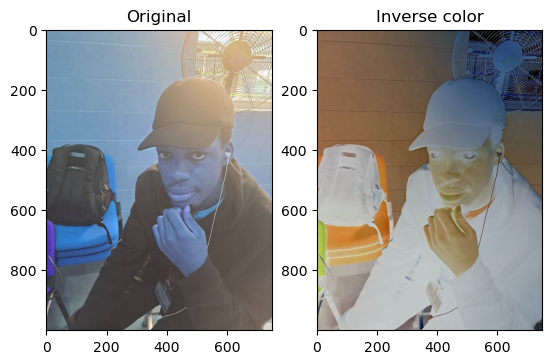

In [1]:
# Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define functions for the different image enhancement techniques 
def image_addition(index):
    image = img_path[index]
    image1 = cv2.imread(image)
    
    user_input = input("Enter another user's name to get their image: ")
    if user_input.lower() in username:
        new_index = username.index(user_input.lower())  # Get index of the second user
        image2_path = img_path[new_index]
        image2 = cv2.imread(image2_path)
    else:
        print("User not found")
        return  # Exit if the second user is not found

    # Resize images
    image1 = cv2.resize(image1, (500, 400))
    image2 = cv2.resize(image2, (500, 400))

    # Add the images with weights
    addImage = cv2.addWeighted(image1, 0.5, image2, 0.7, 0)

    # Display the output image in a window
    cv2.imshow('Weighted Image', addImage)

    # De-allocate any associated memory usage
    if cv2.waitKey(0) & 0xff == 27:
        cv2.destroyAllWindows()
        
def brightness_contrast():
    img = img_path[index]
    # Load the image
    image = cv2.imread(img)

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    # Adjust the brightness and contrast
    brightness = 5
    contrast = 3.5
    image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)

    # Save the image
    cv2.imwrite('img2/contrast_image.jpg', image2)

    # Plot the contrast image
    plt.subplot(1, 2, 2)
    plt.title("Brightness & contrast")
    plt.imshow(image2)
    plt.show()

def sharpening():
    img = img_path[index]
    # Load the image
    image = cv2.imread(img)

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    # Create the sharpening kernel
    kernel = np.array([[0, -1, 0], 
                       [-1, 5, -1], 
                       [0, -1, 0]])

    # Sharpen the image
    sharpened_image = cv2.filter2D(image, -1, kernel)

    # Save the image
    cv2.imwrite('img2/sharpened_image.jpg', sharpened_image)

    # Plot the sharpened image
    plt.subplot(1, 2, 2)
    plt.title("Sharpening")
    plt.imshow(sharpened_image)
    plt.show()

def remove_noise():
    img = img_path[index]
    # Load the image
    image = cv2.imread(img)

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    # Remove noise using a median filter
    filtered_image = cv2.medianBlur(image, 15)

    # Save the image
    cv2.imwrite('img2/Median-Blur.jpg', filtered_image)

    # Plot the blurred image
    plt.subplot(1, 2, 2)
    plt.title("Median Blur")
    plt.imshow(filtered_image)
    plt.show()

def image_scaling():
    img = img_path[index]
    # Load the image
    image = cv2.imread(img)

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    # Scale the image by a factor of 2 along both axes
    scaled_image = cv2.resize(image, None, fx=2, fy=2)

    # Save the image
    cv2.imwrite('img2/scaled.jpg', scaled_image)

    # Plot the Scaled image
    plt.subplot(1, 2, 2)
    plt.title("Scaled")
    plt.imshow(scaled_image)
    plt.show()

def inverse_transform():
    img = img_path[index]
    # Load the image
    image = cv2.imread(img)

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    # Inverse by subtracting from 255
    inverse_image = 255 - image

    # Save the image
    cv2.imwrite('img2/inverse_image.jpg', inverse_image)

    # Plot the Inverse image
    plt.subplot(1, 2, 2)
    plt.title("Inverse color")
    plt.imshow(inverse_image)
    plt.show()

    
# Define lists of usernames, mat numbers, and image paths
username = ['miracle', 'bimpe', 'chima', 'clement', 'dumebi', 'tomi', 'love', 'maryam', 'precious', 'oyinda']
matno = ["MAT001", "MAT002", "MAT003", "MAT004", "MAT005", "MAT006", "MAT007", "MAT008", "MAT009", "MAT0010"]
img_path = ['img2/miracle.jpg', 'img2/bimpe.jpg', 'img2/chima.jpg', 'img2/clement.jpg', 'img2/dumebi.jpg', 
            'img2/tomi.jpg', 'img2/love.jpg', 'img2/maryam.jpg', 'img2/precious.jpg', 'img2/oyinda.jpg']

# Get input from the user
enter_username = input("Enter Username: ")

# Check if the entered username exists in the list
if enter_username.lower() in username:
    index = username.index(enter_username.lower())  # Get the index of the username
    enter_matno = input("Enter Matno: ")  # Get mat number input

    # Check if the entered matno matches the stored matno
    if enter_matno.upper() == matno[index]:
        print("You are logged in, welcome", enter_username + "!")
        
        print("What image enhancement technique would you like to perform on " + enter_username + "'s image?")
        choice = input("Enter A for addition, B for brightness & contrast, S for sharpening, R to remove noise, I for image scaling and V for inverse transform: ")
        
        match choice.upper():
            case "A":
                image_addition(index)
            case "B":
                brightness_contrast()
            case "S":
                sharpening()
            case "R":
                remove_noise()
            case "I":
                image_scaling()
            case "V":
                inverse_transform()
            case _:
                print("Invalid choice")
        
    else:
        print("Incorrect mat number")
else:
    print("Username not found")